In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
import pandasql as ps

plt.style.use('ggplot')
sns.set_palette('Blues_r')
sns.set_context('notebook')

connection = pymysql.connect(host='localhost', 
                             port= 3306, 
                             user='root',passwd='liqh_root2805', 
                             db = 'dwh_whiskey_shop')

cursor = connection.cursor()

def mysql(query):
    return pd.read_sql_query(query, connection)

def sql(query):
    return ps.sqldf(query)

In [9]:
# Creating the query
query = '''
select 
	f.date,
    d.day_name as Day,
    d.month_name as Month,
    d.year_name as Year,
    f.Product_Name,
    f.Alcohol_Price,
    f.Alcohol_Percent,
    f.Alcohol_Capcity,
    c.full_name as customer_name,
    co.country as customer_country,
    f.credit_provider,
    e.full_name as employee_name
from dwh_fact as f
left join whiskey_shop.customers c
on f.customer_id = c.customer_id
left join whiskey_shop.countries as co
on co.country_id = c.country_id 
left join dwh_employees as e
on e.employee_id = f.employee_id
left join dwh_date d
on d.dateId = f.dateId
order by f.date '''

# Generating a Dataframe according to the query
df = mysql(query)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11520\91100225.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


In [11]:
df.head(20)

,date,Day,Month,Year,Product_Name,Alcohol_Price,Alcohol_Percent,Alcohol_Capcity,customer_name,customer_country,credit_provider,employee_name
0,1990-01-02,Tuesday,Jan,1990,Milk & Honey Apex,92.95,56.2,70.0,Sylvia White,Paraguay,Mastercard,Scott Hull
1,1990-01-03,Wednesday,Jan,1990,Bunnahabhain Staoisha 2014,120.00,60.3,70.0,Lucas Ricks,Vanuatu,VISA 16 digit,Thelma Wright
2,1990-01-04,Thursday,Jan,1990,Cotswolds Sherry Cask Single Malt,63.95,57.4,70.0,Amos Lennard,Micronesia,Maestro,Era Doss
3,1990-01-05,Friday,Jan,1990,Ileach Cask Strength,46.45,58.0,70.0,Mirtha Nitti,Cote d'Ivoire,Maestro,Francis Bailey
4,1990-01-05,Friday,Jan,1990,The Six Isles Voyager,34.95,46.0,70.0,John Ayres,Cuba,VISA 13 digit,Frank Johnson
5,1990-01-06,Saturday,Jan,1990,Laphroaig 10 Year Old Sherry Oak Finish,51.95,48.0,70.0,George Williams,Samoa,VISA 16 digit,Gwen Brooks
6,1990-01-07,Sunday,Jan,1990,Lagavulin 9 Year Old,79.95,46.0,70.0,Deborah Charles,Kyrgyz Republic,JCB 16 digit,Scott Hull
7,1990-01-07,Sunday,Jan,1990,Antiquary 12 Year Old,74.95,40.0,75.0,Victor Bryant,Yemen,Mastercard,Alicia August
8,1990-01-09,Tuesday,Jan,1990,Lochlea Sowing Edition,48.95,46.0,70.0,Mark Lewis,New Zealand,Discover,Elizabeth Whittenburg
9,1990-01-09,Tuesday,Jan,1990,The English Original Single Malt Whisky,21.45,43.0,20.0,Larry Gustafson,Algeria,VISA 13 digit,Frank Johnson


In [12]:
# Extracting a list of column
df_columns = df.columns.to_list()

# Iterating through the columns
for column in df_columns:
    
    # If the column is date, change the data type to datetime
    if column == 'date':
        df[column] = pd.to_datetime(df[column])
    
    # If the column is object, change the data type to category
    if df[column].dtype == 'object':
        df[column] = df[column].astype('category')

In [42]:
# Generating a Dataframe containing the 5 most profitable products
query = '''
select 
    count(*) as Number_Of_Transactions, 
    Product_Name, 
    sum(Alcohol_Price) as Profit  
from df
group by Product_Name
order by sum(Alcohol_Price) desc
limit 5
'''

top_5_products = sql(query)
top_5_products

,Number_Of_Transactions,Product_Name,Profit
0,6,Dalmore 50 Year Old,510000.0
1,21,Springbank 1966,225000.0
2,15,Karuizawa 1984,225000.0
3,2,Royal Salute Platinum Jubilee Set,210000.0
4,13,Karuizawa 1981,200000.0


d:\retail_store_de\virtualenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


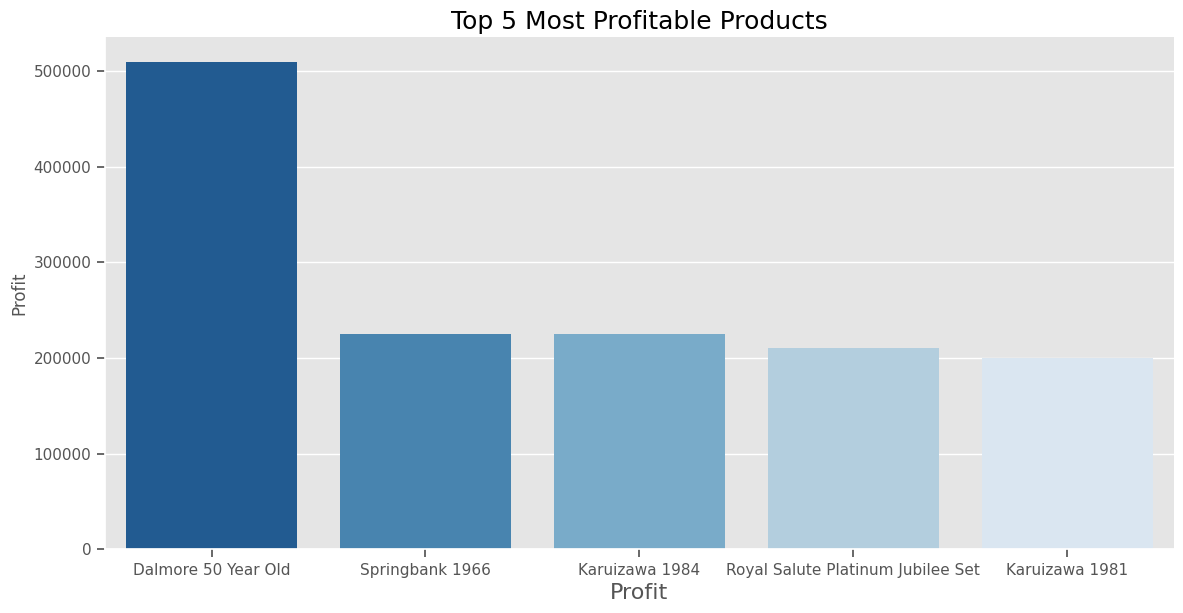

In [50]:
sns.catplot(data = top_5_products, x = 'Product_Name', y = 'Profit', 
            kind = 'bar', palette='Blues_r', height = 6, aspect = 2)
plt.xlabel('Product Name',size = 16)
plt.xlabel('Profit',size = 16)

plt.title('Top 5 Most Profitable Products',size = 18)

plt.show()

In [51]:
query = '''
select 
    count(*) as Number_Of_Transactions, 
    Product_Name
    
from df
group by Product_Name
order by count(*) desc
'''

most_bought_products = sql(query)
most_bought_products

,Number_Of_Transactions,Product_Name
0,41,Laphroaig 10 Year Old
1,39,Chivas Regal 12 Year Old
2,38,Highland Park 12 Year Old
3,38,Caol Ila 12 Year Old
4,35,The English Original Single Malt Whisky
...,...,...
1902,1,Ardbeg 1999 Galileo
1903,1,Ardbeg 1967
1904,1,Angels’ Nectar Blended Malt Original Sample
1905,1,Amahagan Edition No 1 Sample


In [54]:
from empiricaldist import Pmf
# Generating a PMF
prob_mass_func = pd.DataFrame(Pmf.from_seq(df.Product_Name))

# Sorting 
sorted_prob_mass_func = prob_mass_func.iloc[:,0].sort_values(ascending = False)

# Filtering only the top 1 percentile of products
sorted_prob_mass_func = sorted_prob_mass_func[sorted_prob_mass_func > sorted_prob_mass_func.quantile(0.99)]

# Generating a Dataframe
probablity_Dataframe = pd.DataFrame()
probablity_Dataframe['Product'] = sorted_prob_mass_func.index
probablity_Dataframe['Probablity to Buy'] = sorted_prob_mass_func.values

# Output
probablity_Dataframe

,Product,Probablity to Buy
0,Laphroaig 10 Year Old,0.003621
1,Chivas Regal 12 Year Old,0.003444
2,Caol Ila 12 Year Old,0.003356
3,Highland Park 12 Year Old,0.003356
4,The English Original Single Malt Whisky,0.003091
5,Drambuie Whisky Liqueur,0.002826
6,Mackmyra Svensk Rok,0.002649
7,Linlithgow 1975,0.002649
8,Johnnie Walker Blue Label,0.002561
9,Famous Grouse 1992,0.002473


In [55]:
query = '''
select 
    count(*) as Number_Of_Transactions, 
    Day
    
from df
group by Day
order by count(*)
'''

most_bought_products_by_day = sql(query)
most_bought_products_by_day

,Number_Of_Transactions,Day
0,1580,Thursday
1,1590,Sunday
2,1597,Monday
3,1613,Friday
4,1620,Wednesday
5,1651,Tuesday
6,1672,Saturday


In [56]:
query = '''
select 
    count(*) as Number_Of_Transactions, 
    Day,
    month
    
from df
group by month,Day
order by count(*) desc
'''

most_bought_products_by_month = sql(query)

d:\retail_store_de\virtualenv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


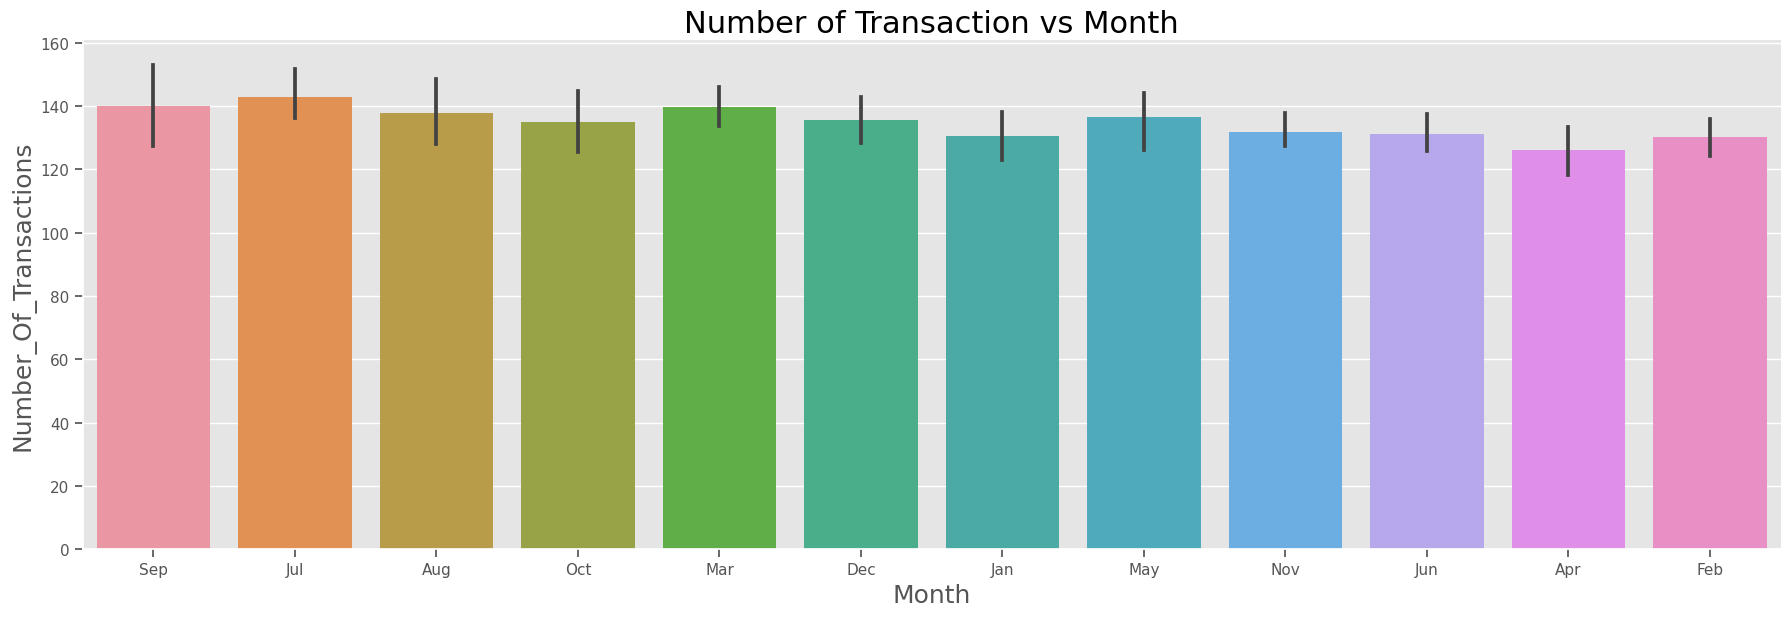

In [57]:
sns.catplot(data = most_bought_products_by_month, 
            y = 'Number_Of_Transactions', x = 'Month', kind = 'bar',
           height = 6, aspect = 3)
plt.xlabel('Month', size = 18)
plt.ylabel('Number_Of_Transactions', size = 18)
plt.title('Number of Transaction vs Month', size = 22)
plt.show()

In [58]:

query = '''
select 
    sum(Alcohol_Price) as Profit, 
    year
    
from df
where year != 2022
group by year
order by year asc
'''

profits_by_year = sql(query)

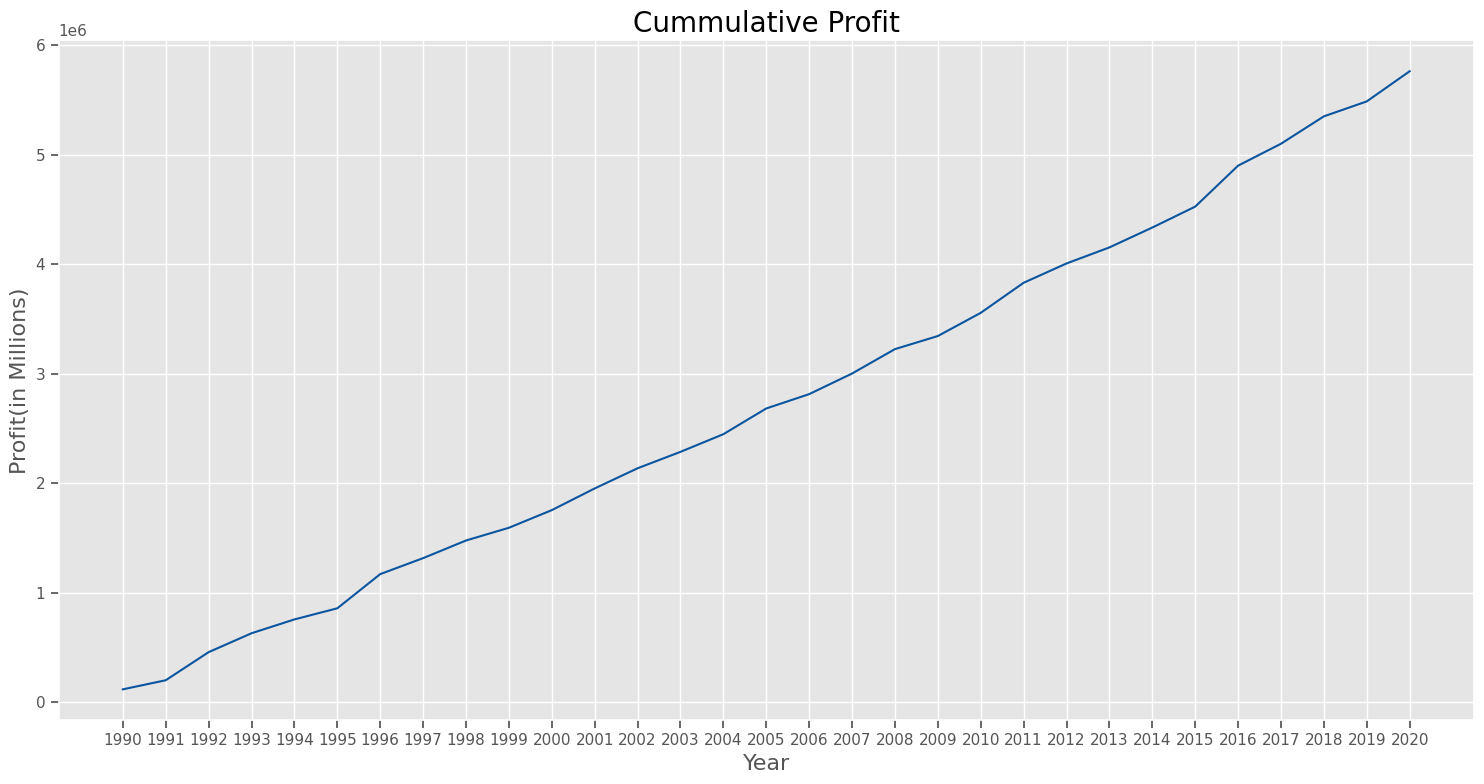

In [59]:

x = profits_by_year.Year
y = np.cumsum(profits_by_year.Profit)

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True
plt.plot(x,y)
plt.xlabel('Year', size = 16)
plt.ylabel('Profit(in Millions)', size = 16)
plt.title('Cummulative Profit', size = 20)
plt.show()

In [63]:

query = '''
select 
    count(distinct customer_name) as Number_of_customers, 
    customer_country
    
from df
group by customer_country
order by customer_country asc
'''

customers_by_country = sql(query)

customers_by_country

,Number_of_customers,customer_country
0,4,Afghanistan
1,6,Albania
2,4,Algeria
3,2,American Samoa
4,2,Andorra
...,...,...
234,6,Wallis and Futuna
235,1,Western Sahara
236,7,Yemen
237,2,Zambia


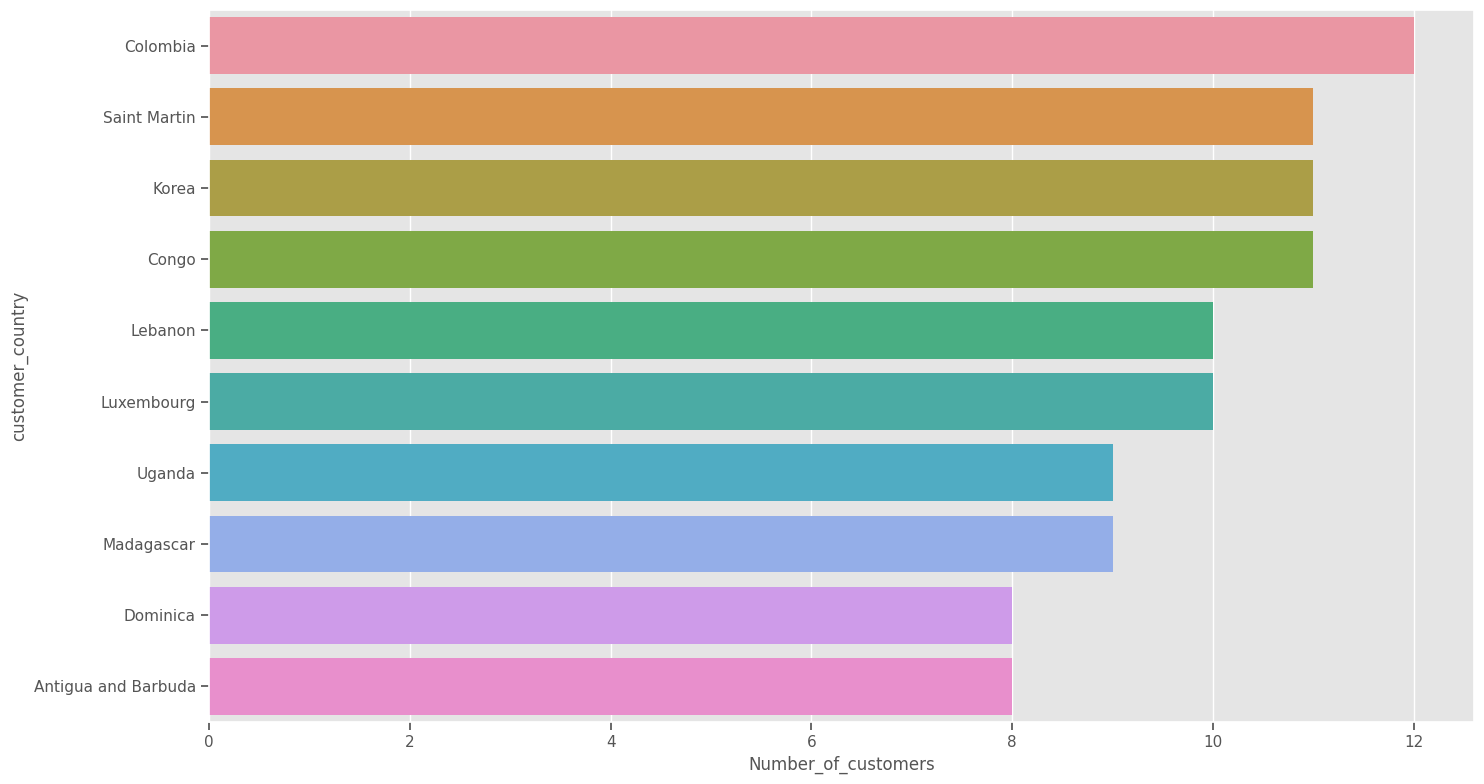

In [67]:

# Filtering the top ten percentile of countries

customers_by_country = customers_by_country.sort_values(by = 'Number_of_customers', ascending=False)

top_ten_percentile= customers_by_country.head(10) 

sns.barplot(data =top_ten_percentile, x='Number_of_customers', y='customer_country')
plt.show()